# **importation des bibliothèques utiles**

In [1]:
import numpy as np #calcul numérique (algébre linéaire)
import pandas as pd #manipulation de données
import seaborn as sns #visualisation
from matplotlib import pyplot as plt #visualisation

# **Chargement de la base de données**

In [2]:
#importation de la base dans le répertoire de travail
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
#chargement de la base de données
data = pd.read_csv(filepath_or_buffer = "titanic.csv", sep = ",")

In [4]:
#Apperçu de la base de données : 3 premières lignes
data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
#Apperçu de la base de données : 3 dernières lignes
data.tail(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Analyse exploratoire**

## **Analyse de forme**

In [6]:
#dimensions de la base de données
print("Nombre de passagers : ",data.shape[0])
print("Nombre de variables : ",data.shape[1])

Nombre de passagers :  891
Nombre de variables :  12


In [7]:
#Types de variables de la base
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#Nombre de types de variables de la base
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [9]:
#Description de la base
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#modalités d'origine de la variable Survived
##Définition d'un dictionnaire de mapping
dicSurvived = {0 : "Non" , 1 : "Oui"}
data["Survived"] = data["Survived"].map(dicSurvived)

In [11]:
#modalités d'origine de la variable Pclass
##Définition d'un dictionnaire de mapping
dicSurvived = {1 : "Classe 1" , 2 : "Classe 2" , 3 :"Classe 3"}
data["Pclass"] = data["Pclass"].map(dicSurvived)

In [12]:
#autre méthode
# data["Pclass"] = data["Pclass"].astype("object")
# data["survived"] = data["survived"].astype("object")

In [13]:
#Vérification 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


La base de données est composées de **7 variables qualitatives** et de **5 variables quantitatives**.

In [14]:
#Nombres de valeurs/modalités uniques de chaque variable
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
#Affichage des valeurs/modalités uniques des variables
#qui ont un nombre de valeurs uniques inférieur ou égal à 7
colNames = data.columns.tolist()
colNames_7 = [i for i in colNames if data[i].nunique() <= 7 ]
for var in colNames_7 :
  print(f"{var:-<15} {data[var].unique()}")

Survived------- ['Non' 'Oui']
Pclass--------- ['Classe 3' 'Classe 1' 'Classe 2']
Sex------------ ['male' 'female']
SibSp---------- [1 0 3 4 2 5 8]
Parch---------- [0 1 2 5 3 4 6]
Embarked------- ['S' 'C' 'Q' nan]


Les variables **PassengerId** , **Name** et **Ticket** sont jugées inutiles à l'analyse. Elles seront écartées.

In [16]:
#Données dupliquées
data.duplicated().sum()

0

La base données comporte **6 lignes dupliquées**. Nous songerons à les supprimer de la base  

In [17]:
#Données manquantes
##1ere méthode
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#Données manquantes
##2eme méthode
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Pourcentages de données manquantes
data.isna().sum()/data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## **Analyse Fond**

### **Listes de variables quanti/quali**

In [20]:
#variables quantitatives
##data.select_dtypes(include = ["float64","int64"]) 1ere méthode
##data.select_dtypes(exclude = "object") 2eme méthode
##data.select_dtypes(include = np.number) 3eme méthode
numCols = data.drop('PassengerId' , axis = 1).select_dtypes(include = np.number).columns.tolist()
numCols

['Age', 'SibSp', 'Parch', 'Fare']

In [21]:
#variables qualitatives
##data.select_dtypes(include = "object") 1ere méthode
##data.select_dtypes(exclude = ["float64","int64"]) 2eme méthode
catCols = data.drop(["Name" , "Ticket" , "Cabin"] , axis = 1).select_dtypes(exclude = np.number).columns.tolist()
catCols

['Survived', 'Pclass', 'Sex', 'Embarked']

### **Analyse Univariée**

In [22]:
#Statistiques descriptives des variables quantitatives
data[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
#Statistiques descriptives des variables qualitatives
data[catCols].describe().T

,count,unique,top,freq
Survived,891,2,Non,549
Pclass,891,3,Classe 3,491
Sex,891,2,male,577
Embarked,889,3,S,644


In [24]:
#Autre méthode
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891,2,Non,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,891,3,Classe 3,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [25]:
#Fréquence des modalité de la Variable cible Survived (Nombre)
data["Survived"].value_counts()

Non    549
Oui    342
Name: Survived, dtype: int64

In [26]:
#Fréquence des modalité de la Variable cible Survived (Pourcentage)
data["Survived"].value_counts(normalize = True)*100

Non    61.616162
Oui    38.383838
Name: Survived, dtype: float64

In [27]:
#définition d'une fonction d'affichage
def afficher(valeur):
  return f"{valeur : .2f}%"

In [28]:
#test de la fonction afficher
print(afficher(42.5897))

 42.59%


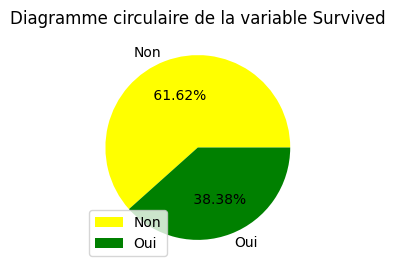

In [29]:
#Diagramme circulaire de la variable cible Survived
plt.figure(figsize = (5 , 3))
plt.pie(data["Survived"].value_counts() ,
        labels = data["Survived"].value_counts().index,
        autopct = afficher,
        colors = ["yellow" , "green"])
plt.title("Diagramme circulaire de la variable Survived")
plt.legend()
plt.show()

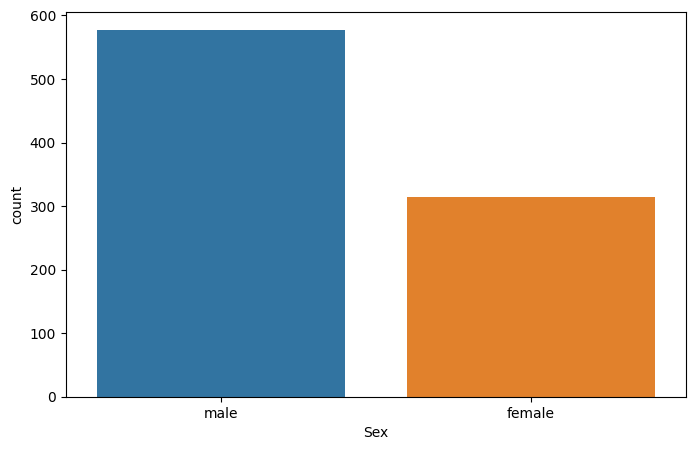

In [30]:
#Diagramme en barre
plt.figure(figsize = (8,5))
sns.countplot(data = data , x = "Sex")
plt.show()

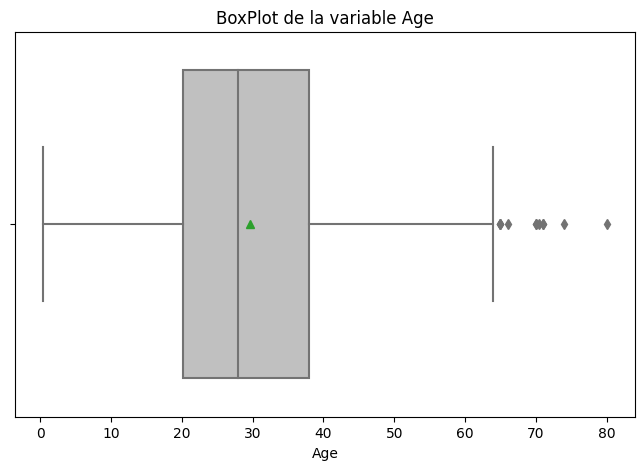

In [31]:
#boxplot de la variable age
plt.figure(figsize = (8,5))
sns.boxplot(data = data , x = "Age", showmeans = True, color = "silver")
plt.title("BoxPlot de la variable Age")
plt.show()

<Figure size 800x500 with 0 Axes>

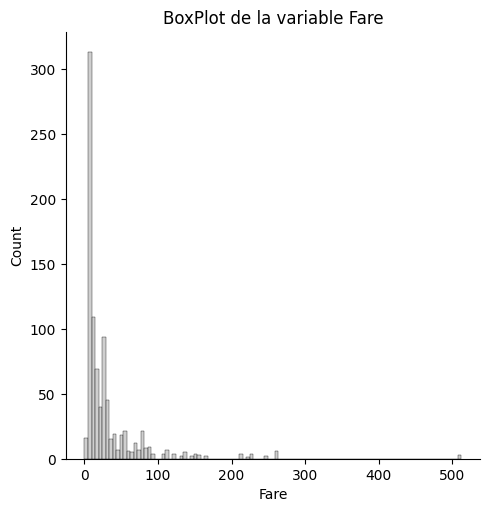

In [32]:
#Histogramme de la variable Age
plt.figure(figsize = (8,5))
sns.displot(data = data , x = "Fare" , color = "silver")
plt.title("BoxPlot de la variable Fare")
plt.show()

### **Analyse Multivariée**

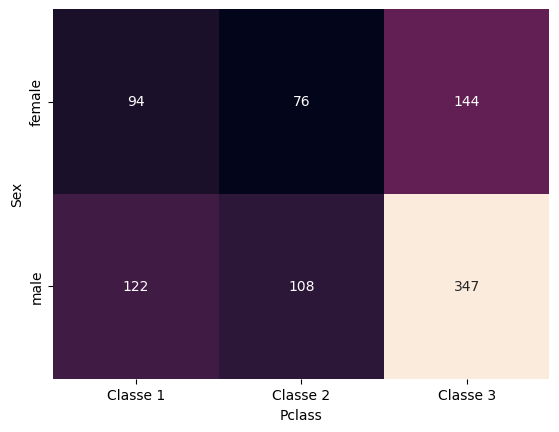

In [33]:
#Tableau croisé des variables Sex et Pclass
tableau = pd.crosstab(data["Sex"] , data["Pclass"]) 
sns.heatmap(tableau , annot = True, fmt = "d", cbar = False)
plt.show()

In [34]:
# Age et Sexe
data.groupby("Sex")[["Age"]].mean()

,Age
Sex,
female,27.915709
male,30.726645


In [35]:
#Pclass et Fare
data.groupby("Pclass")[["Fare"]].sum()

,Fare
Pclass,
Classe 1,18177.4125
Classe 2,3801.8417
Classe 3,6714.6951


<Axes: >

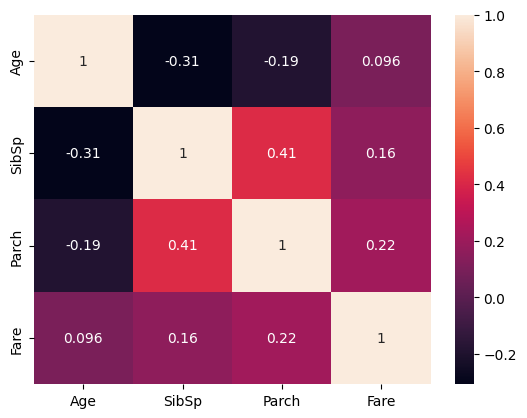

In [36]:
#Matrice de corrélation
sns.heatmap(data[numCols].corr() , annot = True)

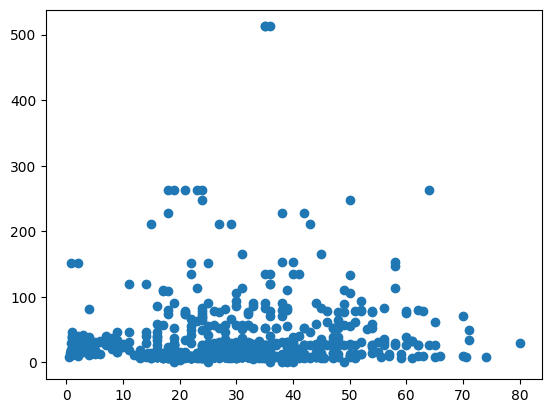

In [37]:
#Nuage de point entre Age et Fare
plt.scatter(data["Age"] , data["Fare"])

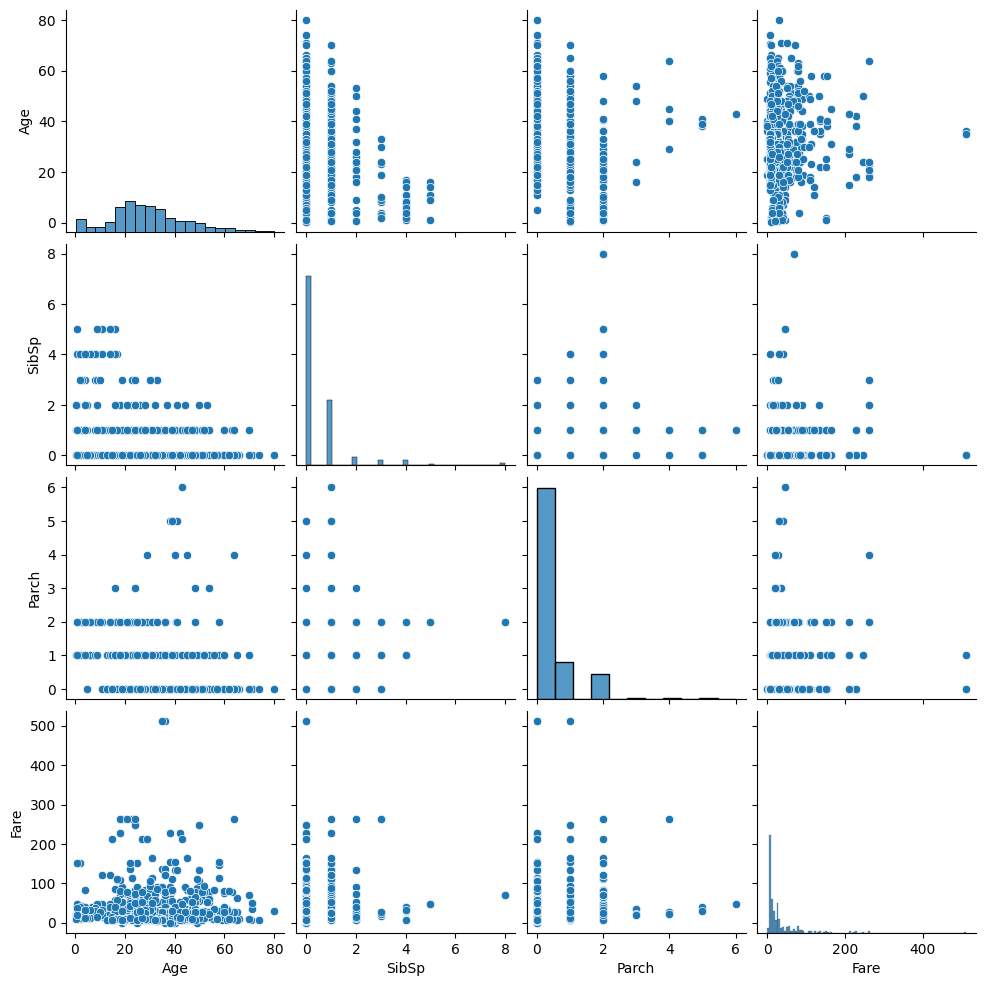

In [38]:
#Nuage de points avec pairplot
sns.pairplot(data[numCols])

# **Prétraitement**

## **Préliminaires**

In [39]:
#copie du dataframe
df = data.copy()

In [40]:
#supprimer les lignes dupliquées
df.drop_duplicates(inplace = True)

In [41]:
#Vérification
df.duplicated().sum()

0

In [42]:
#Suppression des variables jugées inutiles 
df.drop(["Name" , "PassengerId", "Cabin", "Ticket"] , axis = 1 , inplace = True)

In [43]:
#Apperçu
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Non,Classe 3,male,22.0,1,0,7.2500,S
1,Oui,Classe 1,female,38.0,1,0,71.2833,C
2,Oui,Classe 3,female,26.0,0,0,7.9250,S
3,Oui,Classe 1,female,35.0,1,0,53.1000,S
4,Non,Classe 3,male,35.0,0,0,8.0500,S


## **Données manquantes**

### **Suppression**

In [44]:
#données manquantes
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [45]:
#Supression des lignes contenant des NA
dfWithoutNa = df.dropna()

In [46]:
#Vérification
dfWithoutNa.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
#Nombres de lignes supprimées
df.shape[0] - dfWithoutNa.shape[0]

179

In [48]:
#proportion avant suppression
df.Survived.value_counts(normalize = True)*100

Non    61.616162
Oui    38.383838
Name: Survived, dtype: float64

In [49]:
#proportion après suppression
dfWithoutNa.Survived.value_counts(normalize = True)*100

Non    59.550562
Oui    40.449438
Name: Survived, dtype: float64

### **Imputation avec pandas (fillna)**

In [50]:
#copy du dataframe
dfImputedPandas = df.copy()

In [51]:
#Imputation de la variable age en utilisant une méthode de pandas
dfImputedPandas["Age"].fillna(dfImputedPandas["Age"].median() , inplace = True)

In [52]:
#Imputation de la variable Embarked en utilisant une méthode de pandas
dfImputedPandas["Embarked"].fillna(dfImputedPandas["Embarked"].mode()[0] , inplace = True)

In [53]:
#Vérification
dfImputedPandas.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### **Imputation avec pandas (interpolate)**

In [54]:
#copy du dataframe
dfImputedPandas = df.copy()

In [55]:
#imputation avec la méthode interpolate qui ne s'applique qu'aux variables qui sont quantitatives
dfImputedPandas.interpolate(inplace = True)

In [56]:
#apperçu du nombre de données manquantes
dfImputedPandas.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### **Imputation avec sklearn (SimpleImputer)**

In [57]:
#copy du dataframe
dfImputedSklearn1 = df.copy()

In [58]:
#importation du transformateur 
from sklearn.impute import SimpleImputer

In [59]:
#instanciation pour la variable Age
imputeAge = SimpleImputer(strategy = "median")

In [60]:
#imputation par SimpleImputer avec la stratégie médiane
dfImputedSklearn1[["Age"]] = imputeAge.fit_transform(dfImputedSklearn1[["Age"]])

In [61]:
#instanciation pour la variable Embarked
imputeEmbarked = SimpleImputer(strategy = "most_frequent")

In [62]:
#imputation par SimpleImputer avec la stratégie most_frequent(mode)
dfImputedSklearn1[["Embarked"]] = imputeEmbarked.fit_transform(dfImputedSklearn1[["Embarked"]])

In [63]:
#Vérification 
dfImputedSklearn1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### **Imputation avec sklearn (KNNImputer)**

In [64]:
#copy du dataframe
dfImputedSklearn2 = df.copy()

In [65]:
#importation du transformateur
from sklearn.impute import KNNImputer

In [66]:
#instanciation 
knn = KNNImputer()

In [67]:
#encodage de la variable embarked
dicEmbarked = {"S" : 3 , "C" : 2 , "Q" : 1}
dfImputedSklearn2["Embarked"] = dfImputedSklearn2["Embarked"].map(dicEmbarked)

In [68]:
#imputation avec l'algorithme des k voisins les plus proches
dfImputedSklearn2[["Age" , "Embarked"]] = knn.fit_transform(dfImputedSklearn2[["Age" , "Embarked"]])

In [69]:
#vérification
dfImputedSklearn2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [70]:
#valeur unique de la variable Embarked après imputation par knn
dfImputedSklearn2["Embarked"].unique()

array([3. , 2. , 1. , 2.8])

In [71]:
#arrondir les valeurs de la variable Embarked après imputation
dfImputedSklearn2["Embarked"] = dfImputedSklearn2["Embarked"].map(round)

In [72]:
#valeur unique de la variable Embarked après imputation par knn
dfImputedSklearn2["Embarked"].unique()

array([3, 2, 1])

In [73]:
#inverse de l'encodage de la variable embarked
dicEmbarked = {3: "S" , 2 : "C" , 1 : "Q"}
dfImputedSklearn2["Embarked"] = dfImputedSklearn2["Embarked"].map(dicEmbarked)

In [74]:
#vérification
dfImputedSklearn2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [75]:
#apperçu 
dfImputedSklearn2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Non,Classe 3,male,22.0,1,0,7.2500,S
1,Oui,Classe 1,female,38.0,1,0,71.2833,C
2,Oui,Classe 3,female,26.0,0,0,7.9250,S
3,Oui,Classe 1,female,35.0,1,0,53.1000,S
4,Non,Classe 3,male,35.0,0,0,8.0500,S


## **Encodage**

### **Encodage par fréquence**

In [76]:
#copie du dataframe
dfEncoded1 = dfImputedSklearn2.copy()

In [77]:
#Variable Pclass
dfEncoded1["Pclass"].value_counts()

Classe 3    491
Classe 1    216
Classe 2    184
Name: Pclass, dtype: int64

In [78]:
#Encodage de la variable Pclass
dfEncoded1["Pclass"].map(dfEncoded1["Pclass"].value_counts())

0      491
1      216
2      491
3      216
4      491
      ... 
886    184
887    216
888    491
889    216
890    491
Name: Pclass, Length: 891, dtype: int64

In [79]:
#apperçu 
dfEncoded1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Non,Classe 3,male,22.0,1,0,7.2500,S
1,Oui,Classe 1,female,38.0,1,0,71.2833,C
2,Oui,Classe 3,female,26.0,0,0,7.9250,S
3,Oui,Classe 1,female,35.0,1,0,53.1000,S
4,Non,Classe 3,male,35.0,0,0,8.0500,S


In [80]:
#definition d'une fonction d'encodage par fréquence
def freqEncoder(dataframe , categoricalVarList):
  for var in categoricalVarList :
    dataframe[var] = dataframe[var].map(dataframe[var].value_counts())
  return dataframe

In [81]:
#Encodage par fréquence
freqEncoder(dfEncoded1 , catCols).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,549,491,577,22.0,1,0,7.2500,646
1,342,216,314,38.0,1,0,71.2833,168
2,342,491,314,26.0,0,0,7.9250,646
3,342,216,314,35.0,1,0,53.1000,646
4,549,491,577,35.0,0,0,8.0500,646


Cette méthode n'est possible que si les fréquences des modalités sont différentes.

### **Encodage Ordinal**

In [82]:
#copie du dataframe
dfEncoded2 = dfImputedSklearn2.copy()

In [83]:
#apperçu 
dfEncoded2[catCols].head()

,Survived,Pclass,Sex,Embarked
0,Non,Classe 3,male,S
1,Oui,Classe 1,female,C
2,Oui,Classe 3,female,S
3,Oui,Classe 1,female,S
4,Non,Classe 3,male,S


In [84]:
#importation du transformateur de sklearn (OrdinalEncoder)
from sklearn.preprocessing import OrdinalEncoder

In [85]:
#liste des variables catégorielles
catCols

['Survived', 'Pclass', 'Sex', 'Embarked']

In [86]:
dfEncoded2["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
#Listes d'orde de chaque variable catégorielle
ordre_survived = ["Non" , "Oui"]
ordre_Pclass = ["Classe 3" , "Classe 2" , "Classe 1" ]
ordre_Sex = ["female" , "male"]
ordre_Embarked = ["Q" , "C" , "S"]

In [88]:
#instanciation
encoderOrdinal = OrdinalEncoder(categories=[ordre_survived , ordre_Pclass , ordre_Sex , ordre_Embarked])

In [89]:
#Encodage ordinal
dfEncoded2[catCols] = encoderOrdinal.fit_transform(dfEncoded2[catCols])

In [90]:
#Apperçu
dfEncoded2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0.0,1.0,22.0,1,0,7.2500,2.0
1,1.0,2.0,0.0,38.0,1,0,71.2833,1.0
2,1.0,0.0,0.0,26.0,0,0,7.9250,2.0
3,1.0,2.0,0.0,35.0,1,0,53.1000,2.0
4,0.0,0.0,1.0,35.0,0,0,8.0500,2.0


In [91]:
#Modalités et fréquences de la variable Survived après encodage (ordinal)
dfEncoded2.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

### **Encodage OneHot**

#### **Encodage OneHot (pandas)**

In [92]:
#copie du dataframe
dfEncoded3 = dfImputedSklearn2.copy()

In [93]:
#apperçu
dfEncoded3.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,Non,Classe 2,male,27.0,0,0,13.00,S
887,Oui,Classe 1,female,19.0,0,0,30.00,S
888,Non,Classe 3,female,31.4,1,2,23.45,S
889,Oui,Classe 1,male,26.0,0,0,30.00,C
890,Non,Classe 3,male,32.0,0,0,7.75,Q


In [94]:
#Encodage oneHot avec get_dummies
dfEncoded3 = pd.get_dummies(data = dfEncoded3 , drop_first = False)

In [95]:
#apperçu
dfEncoded3.head()

,Age,SibSp,Parch,Fare,Survived_Non,Survived_Oui,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


<Axes: >

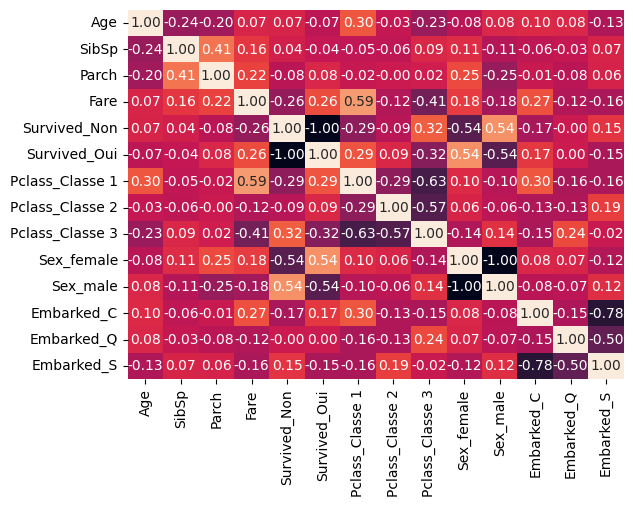

In [96]:
#matrice de corrélation
sns.heatmap(dfEncoded3.corr() , annot = True , fmt = ".2f" , cbar = False)

In [97]:
#Suppression des colonnes corrélées
dfEncoded3.drop(["Survived_Non" , "Sex_female"] , axis = 1).head()

,Age,SibSp,Parch,Fare,Survived_Oui,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,0,1,1,0,0,1
1,38.0,1,0,71.2833,1,1,0,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,0,0,1
3,35.0,1,0,53.1000,1,1,0,0,0,0,0,1
4,35.0,0,0,8.0500,0,0,0,1,1,0,0,1


#### **Encodage OneHot (sklearn)**

In [98]:
#copie du dataframe
dfEncoded4 = dfImputedSklearn2.copy()

In [99]:
#apperçu
dfEncoded4.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,Non,Classe 2,male,27.0,0,0,13.00,S
887,Oui,Classe 1,female,19.0,0,0,30.00,S
888,Non,Classe 3,female,31.4,1,2,23.45,S
889,Oui,Classe 1,male,26.0,0,0,30.00,C
890,Non,Classe 3,male,32.0,0,0,7.75,Q


In [100]:
#importation du transformateur 
from sklearn.preprocessing import OneHotEncoder

In [101]:
#instanciation
encoderOneHot = OneHotEncoder(sparse_output = False)

In [102]:
#Encodage OneHot
encoderOneHot.fit_transform(dfEncoded4[catCols]).shape

(891, 10)

In [103]:
#liste des variables numériques
numCols

['Age', 'SibSp', 'Parch', 'Fare']

In [104]:
#liste des variables catégorielles
catCols

['Survived', 'Pclass', 'Sex', 'Embarked']

Ajouter le tableau numpy généré par le transformateur oneHot au dataframe dfEncoded4 en précisant le nom de chaque colonne (sans oublier les variables quantitatives).

In [105]:
#liste des variables pour le nouveau dataframe
newList = [f"{var}_{mod}" for var in catCols for mod in np.sort(dfEncoded4[var].unique())]
newList

['Survived_Non',
 'Survived_Oui',
 'Pclass_Classe 1',
 'Pclass_Classe 2',
 'Pclass_Classe 3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [106]:
#création de dataframe
pd.DataFrame(encoderOneHot.fit_transform(dfEncoded4[catCols]) , columns = newList).head()

,Survived_Non,Survived_Oui,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### **Encodage final**

- Nous allons encoder les variables catégorielles binaires de manière ordinal (survived et sex)

- Pour les variales catégorielles multiclasses, nous choisissons la méthoe oneHot

In [107]:
dfImputedSklearn2['Sex'].unique()

array(['male', 'female'], dtype=object)

In [108]:
#copie du dataframe
dfEncoded = dfImputedSklearn2.copy()
#Encodage de Sex
dicSex = {"male" : 1 , "female" : 0}
dfEncoded["Sex"] =  dfEncoded["Sex"].map(dicSex)
#Encodage Survived
dicSurvived = {"Oui" : 1 , "Non" : 0}
dfEncoded["Survived"] =  dfEncoded["Survived"].map(dicSurvived)
#encode oneHot pour le reste
dfEncodedFinal = pd.get_dummies(dfEncoded)
#apperçu 
dfEncodedFinal.tail()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
886,0,1,27.0,0,0,13.00,0,1,0,0,0,1
887,1,0,19.0,0,0,30.00,1,0,0,0,0,1
888,0,0,31.4,1,2,23.45,0,0,1,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0,1,0,0
890,0,1,32.0,0,0,7.75,0,0,1,0,1,0


## **Division de la base en train/test (80 - 20)**

In [109]:
#séparation de la variable cible des variables explicatives
X = dfEncodedFinal.drop("Survived" , axis =  1)
y = dfEncodedFinal["Survived"]

In [110]:
#importation de la fonction de découpage (train_test_split)
from sklearn.model_selection import train_test_split as tts

In [111]:
#découpage 80 - 20
X_train , X_test, y_train, y_test = tts(X , y , test_size = 0.2 , random_state = 42 , stratify = y)

In [112]:
#vérification des dimensions
print("Dimensions de X_train", X_train.shape)
print("Dimensions de y_train", y_train.shape)

Dimensions de X_train (712, 11)
Dimensions de y_train (712,)


In [113]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
692,1,31.4,0,0,56.4958,0,0,1,0,0,1
481,1,31.4,0,0,0.0000,0,1,0,0,0,1
527,1,31.4,0,0,221.7792,1,0,0,0,0,1
855,0,18.0,0,1,9.3500,0,0,1,0,0,1
801,0,31.0,1,1,26.2500,0,1,0,0,0,1


## **Normalisation / Standardidisation**

#### **StandardScaler**

$\Large{x^{\prime}_{i} = \frac{x_{i} - \overline{x}}{\sigma}}$

In [114]:
#importation de l'algorithme
from sklearn.preprocessing import StandardScaler
#instanciation
standardScaler = StandardScaler()

In [115]:
## Données d'entraînement
#copie du dataframe précédent
X_trainScaledStandard = X_train.copy()
#standard scaler
X_trainScaledStandard[numCols] = standardScaler.fit_transform(X_train[numCols])
#apperçu
X_trainScaledStandard.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
692,1,0.035179,-0.465084,-0.466183,0.513812,0,0,1,0,0,1
481,1,0.035179,-0.465084,-0.466183,-0.662563,0,1,0,0,0,1
527,1,0.035179,-0.465084,-0.466183,3.955399,1,0,0,0,0,1
855,0,-0.966786,-0.465084,0.727782,-0.467874,0,0,1,0,0,1
801,0,0.005270,0.478335,0.727782,-0.115977,0,1,0,0,0,1


In [116]:
## Données de test
#copie du dataframe précédent
X_testScaledStandard = X_test.copy()
#standard scaler
X_testScaledStandard[numCols] = standardScaler.transform(X_test[numCols])
#apperçu
X_testScaledStandard.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
565,1,-0.518145,1.421753,-0.466183,-0.159704,0,0,1,0,0,1
160,1,0.977326,-0.465084,0.727782,-0.327324,0,0,1,0,0,1
553,1,-0.667692,-0.465084,-0.466183,-0.512122,0,0,1,1,0,0
860,1,0.753005,1.421753,-0.466183,-0.368795,0,0,1,0,0,1
241,0,0.521207,0.478335,-0.466183,-0.339817,0,0,1,0,1,0


#### **MinMaxScaler**

$\Large{x^{\prime}_{i} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}}$

In [117]:
#importation de l'algorithme
from sklearn.preprocessing import MinMaxScaler
#instanciation
minMaxScaler = MinMaxScaler()

In [118]:
## Données d'entraînement
#copie du dataframe précédent
X_trainScaledMinMax = X_train.copy()
#standard scaler
X_trainScaledMinMax[numCols] = minMaxScaler.fit_transform(X_train[numCols])
#apperçu
X_trainScaledMinMax.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
692,1,0.389294,0.000,0.000000,0.110272,0,0,1,0,0,1
481,1,0.389294,0.000,0.000000,0.000000,0,1,0,0,0,1
527,1,0.389294,0.000,0.000000,0.432884,1,0,0,0,0,1
855,0,0.220910,0.000,0.166667,0.018250,0,0,1,0,0,1
801,0,0.384267,0.125,0.166667,0.051237,0,1,0,0,0,1


In [119]:
## Données de test
#copie du dataframe précédent
X_testScaledMinMax = X_test.copy()
#standard scaler
X_testScaledMinMax[numCols] = minMaxScaler.transform(X_test[numCols])
#apperçu
X_testScaledMinMax.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
565,1,0.296306,0.250,0.000000,0.047138,0,0,1,0,0,1
160,1,0.547625,0.000,0.166667,0.031425,0,0,1,0,0,1
553,1,0.271174,0.000,0.000000,0.014102,0,0,1,1,0,0
860,1,0.509927,0.250,0.000000,0.027538,0,0,1,0,0,1
241,0,0.470973,0.125,0.000000,0.030254,0,0,1,0,1,0


#### **RobustScaler**

$\Large{x^{\prime}_{i} = \frac{x_{i} - median}{IQR}}$   avec   $IQR = Q_{3} - Q_{1}$

In [120]:
#importation de l'algorithme
from sklearn.preprocessing import RobustScaler
#instanciation
robustScaler = RobustScaler()

In [121]:
## Données d'entraînement
#copie du dataframe précédent
X_trainScaledRobust = X_train.copy()
#standard scaler
X_trainScaledRobust[numCols] = robustScaler.fit_transform(X_train[numCols])
#apperçu
X_trainScaledRobust.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
692,1,0.000000,0.0,0.0,1.819652,0,0,1,0,0,1
481,1,0.000000,0.0,0.0,-0.625609,0,1,0,0,0,1
527,1,0.000000,0.0,0.0,8.973477,1,0,0,0,0,1
855,0,-0.824615,0.0,1.0,-0.220921,0,0,1,0,0,1
801,0,-0.024615,1.0,1.0,0.510548,0,1,0,0,0,1


In [122]:
## Données de test
#copie du dataframe précédent
X_testScaledRobust = X_test.copy()
#standard scaler
X_testScaledRobust[numCols] = robustScaler.transform(X_test[numCols])
#apperçu
X_testScaledRobust.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_Classe 1,Pclass_Classe 2,Pclass_Classe 3,Embarked_C,Embarked_Q,Embarked_S
565,1,-0.455385,2.0,0.0,0.419655,0,0,1,0,0,1
160,1,0.775385,0.0,1.0,0.071234,0,0,1,0,0,1
553,1,-0.578462,0.0,0.0,-0.312895,0,0,1,1,0,0
860,1,0.590769,2.0,0.0,-0.014971,0,0,1,0,0,1
241,0,0.400000,1.0,0.0,0.045264,0,0,1,0,1,0


# **Modélisation**

## **Entrainement standard**

In [123]:
#importation du f1_score
from sklearn.metrics import f1_score
#importation du la fonction time()
from time import time

In [124]:
#Définition de fonction 
def modelisation(ModelsList , X_train_scaled , y_train , X_test_scaled , y_test ):
  scores = []
  for mod in ModelsList :
    try : 
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    model.fit(X_train_scaled , y_train) #entrainement
    fin = time() #calcul du temps de fin
    y_pred_train = model.predict(X_train_scaled) #calcul des prédictions par rapport aux données d'entrainement
    y_pred_test = model.predict(X_test_scaled) #calcul des prédictions par rapport aux données de test
    scores.append({"Modeles" : type(model).__name__ , 
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : f1_score(y_train , y_pred_train) ,
                   "f1_test_score" : f1_score(y_test , y_pred_test)})
  return pd.DataFrame(scores)

In [156]:
  #importation des algorithmes
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier

In [126]:
#liste de modeles
ModelsList = [RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier,
              DecisionTreeClassifier , KNeighborsClassifier, LogisticRegression , SVC]

In [127]:
#premier essai de modélisation
scores = modelisation(ModelsList ,X_trainScaledRobust, y_train , X_testScaledRobust , y_test)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,0.234054,0.977695,0.735294
AdaBoostClassifier,0.121548,0.798535,0.709220
GradientBoostingClassifier,0.144526,0.874759,0.725806
DecisionTreeClassifier,0.003933,0.977612,0.725926
KNeighborsClassifier,0.002919,0.798493,0.692308
LogisticRegression,0.023370,0.739884,0.720000
SVC,0.018740,0.763359,0.748092


In [128]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,1.000000,0.977695,0.735294
AdaBoostClassifier,0.519317,0.798535,0.709220
GradientBoostingClassifier,0.617490,0.874759,0.725806
DecisionTreeClassifier,0.016805,0.977612,0.725926
KNeighborsClassifier,0.012472,0.798493,0.692308
LogisticRegression,0.099850,0.739884,0.720000
SVC,0.080069,0.763359,0.748092


<Axes: xlabel='Modeles'>

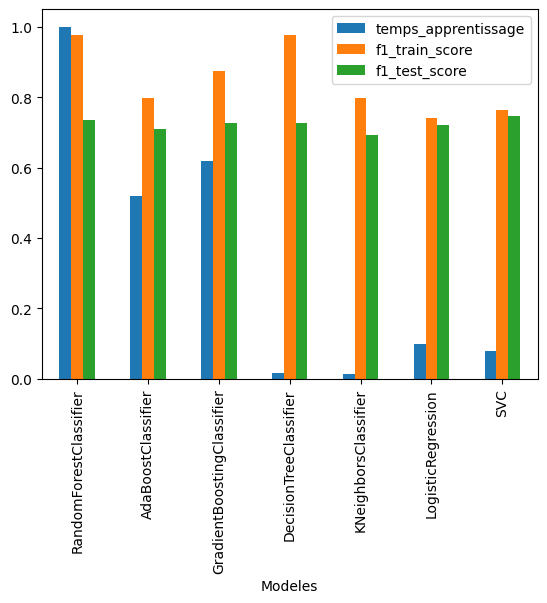

In [129]:
#visualisation 
scores.plot.bar()

## **Entrainement par validaiton croisée**

In [130]:
#importation de la fonction de validation croisée
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [145]:
#définition du nombre de split
cv = StratifiedKFold(n_splits = 5)

In [148]:
#Définition de fonction de validation croisee
def crossValidation(ModelsList , X_train_scaled , y_train):
  scores = []
  for mod in ModelsList :
    try : 
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    score = cross_validate(estimator = model , X = X_train_scaled , y = y_train , cv = cv , 
               scoring = 'f1', n_jobs = -1 , return_train_score = True)  #entrainement
    fin = time() #calcul du temps de fin
    scores.append({"Modeles" : type(model).__name__ , 
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : score['train_score'].mean() ,
                   "f1_test_score" : score['test_score'].mean()})
  return pd.DataFrame(scores)

In [151]:
#entrainement par validation croisée
scores = crossValidation(ModelsList ,X_trainScaledRobust, y_train)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,1.156669,0.981075,0.741172
AdaBoostClassifier,0.662225,0.796194,0.744227
GradientBoostingClassifier,0.608353,0.875697,0.735056
DecisionTreeClassifier,0.069529,0.980933,0.705136
KNeighborsClassifier,0.191094,0.797436,0.725407
LogisticRegression,0.097974,0.735602,0.726704
SVC,0.171807,0.767672,0.746138


In [152]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,1.000000,0.981075,0.741172
AdaBoostClassifier,0.572528,0.796194,0.744227
GradientBoostingClassifier,0.525953,0.875697,0.735056
DecisionTreeClassifier,0.060111,0.980933,0.705136
KNeighborsClassifier,0.165211,0.797436,0.725407
LogisticRegression,0.084704,0.735602,0.726704
SVC,0.148536,0.767672,0.746138


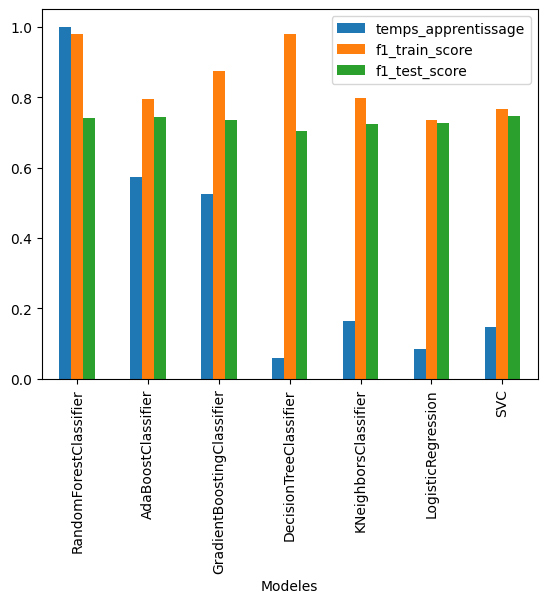

In [153]:
#visualisation 
scores.plot.bar()
plt.show()

D'après les deux techniques d'entrainement utilisées (standard et par valaidation croisée), l'algorithme des SVC (Machine a vecteur de support pour la classification) a le plus bon sens de la généralisation. C'est à dire qu'il a un score de test très proche de celui de l'entrainement.

Le score de test est de `74,8%`

## **Optimisation de l'algorithme SVC**

In [161]:
#importation de l'algorithme d'optimisation (grille de recherche)
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [162]:
#dictionnaire d'hyperparamètres
hyperParamsDict = {'C' : [0.1 , 1 , 10 , 100, 1000] ,
                   'kernel' : ['linear' , 'rbf' , 'poly'],
                   'gamma' : [0.0001 , 0.001 , 0.01 , 1]}

In [164]:
#instanciation
grid = RandomizedSearchCV(estimator = SVC() , param_distributions = hyperParamsDict , scoring = 'f1' , n_jobs = -1 , cv = cv , n_iter = 20)

In [165]:
#entrainement
grid.fit(X_trainScaledRobust , y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [0.0001, 0.001, 0.01, 1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='f1')

In [166]:
#Meilleur combinaison d'hyperparamètres
grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}

In [167]:
#Meilleur score 
grid.best_score_

0.7386585071749951

In [168]:
#instanciation du SVC avec la meilleur combinaison
svc = SVC(**grid.best_params_)

In [169]:
#entrainement
svc.fit(X_trainScaledRobust , y_train)

SVC(C=1000, gamma=0.01)

In [170]:
#score d'entrainement
pred_train = svc.predict(X_trainScaledRobust)
f1_score(y_train , pred_train)

0.7818930041152263

In [171]:
#score de test 
pred_test = svc.predict(X_testScaledRobust)
f1_score(y_test , pred_test)

0.7058823529411766

In [172]:
#Nouvelle instanciation avec les valeurs par défaut
finalSVC = SVC()

In [173]:
#entrainement final
finalSVC.fit(X_trainScaledRobust , y_train)

SVC()

In [174]:
#score d'entrainement final
pred_train = finalSVC.predict(X_trainScaledRobust)
f1_score(y_train , pred_train)

0.7633587786259542

In [175]:
#score de test 
pred_test = finalSVC.predict(X_testScaledRobust)
f1_score(y_test , pred_test)

0.7480916030534351

# **TPOT Classifier (Tree-based Pipeline Optimization Tool)**

In [177]:
#installation de la bibliothèque tpot
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=769f41d68a936fda81c9e5fcd095cd04f36c02bba0bbaf75a8ee3fc5850166bd
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [178]:
#importation de l'algorithme
from tpot import TPOTClassifier

In [183]:
#instanciation de l'algorithme
finalModel = TPOTClassifier(generations = 20 , population_size = 10 , cv = None , 
                            scoring = 'f1' , n_jobs = -1 , verbosity = 2, random_state = 42)

In [184]:
#entrainement de l'algorithme
finalModel.fit(X_trainScaledRobust , y_train)

Optimization Progress:   0%|          | 0/210 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7536013800948573

Generation 2 - Current best internal CV score: 0.7536013800948573

Generation 3 - Current best internal CV score: 0.7557050966964622

Generation 4 - Current best internal CV score: 0.760602362271334

Generation 5 - Current best internal CV score: 0.760602362271334

Generation 6 - Current best internal CV score: 0.7626169552201363

Generation 7 - Current best internal CV score: 0.7626169552201363

Generation 8 - Current best internal CV score: 0.7626169552201363

Generation 9 - Current best internal CV score: 0.7626169552201363

Generation 10 - Current best internal CV score: 0.7626169552201363

Generation 11 - Current best internal CV score: 0.7626169552201363

Generation 12 - Current best internal CV score: 0.7688199610529709

Generation 13 - Current best internal CV score: 0.7688199610529709

Generation 14 - Current best internal CV score: 0.7688199610529709

Generation 15 - Current best internal CV score: 0.76881996

TPOTClassifier(cv=None, generations=20, n_jobs=-1, population_size=10,
               random_state=42, scoring='f1', verbosity=2)

In [185]:
#Score de test
finalModel.score(X_testScaledRobust , y_test)

0.6885245901639344

In [186]:
#exportation du modele
finalModel.export("tpot_classifier.py")

In [ ]:
#